In [3]:
# Importing the Dataset from GitHub where it was uploaded
link='https://raw.githubusercontent.com/sran-gurkaran/Auto_ML_on_Azure/main/Year_2_Bankruptcy_Data.csv'
import pandas as pd
import numpy as np
df=pd.read_csv(link,encoding='unicode_escape')

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (0,1,2,5,6,8,9,10,13,17,21,23,24,28,34,35,37,47,50,54,56,58) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Printing the Dataset
df

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,Status After 4 Years
0,0.20235,0.465,0.24038,1.5171,-14.547,0.51069,0.25366,0.91816,1.1519,0.42695,...,0.13184,0.47395,0.86816,0.00023951,8.5487,5.1655,107.74,3.3879,5.344,0
1,0.030073,0.59563,0.18668,1.3382,-37.859,-0.00031864,0.04167,0.6789,0.32356,0.40437,...,0.12146,0.074369,0.87235,0,1.5264,0.63305,622.66,0.58619,1.2381,0
2,0.25786,0.29949,0.66519,3.2211,71.799,0,0.31877,2.332,1.6762,0.69841,...,0.16499,0.36921,0.81614,0,4.3325,3.1985,65.215,5.5969,47.466,0
3,0.22716,0.6785,0.042784,1.0828,-88.212,0,0.28505,0.47384,1.3241,0.3215,...,0.29358,0.70657,0.78617,0.48456,5.2309,5.0675,142.46,2.5621,3.0066,0
4,0.085443,0.38039,0.35923,1.9444,21.731,0.1879,0.10823,1.3714,1.1126,0.52167,...,0.10124,0.16379,0.89876,0,5.7035,4.002,89.058,4.0984,5.9874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10168,0.02997,0.66806,0.066243,1.1103,-105.55,0.02997,0.038888,0.48274,1.0292,0.3225,...,0.028377,0.092931,0.97162,0.20982,3.0914,3.9456,192.22,1.8988,3.4199,1
10169,0.012843,0.49306,-0.16062,0.61898,-24.801,0.012843,0.012843,0.9059,1.0145,0.44666,...,0.014247,0.028752,0.98575,0.16009,48.666,63.752,40.071,9.1087,5.1956,1
10170,0.015092,0.55759,-0.2846,0.48599,-85.571,0.015092,0.0098258,0.69488,1.006,0.38746,...,0.0059714,0.03895,0.99403,0.010091,15.053,11.964,114.25,3.1948,2.4201,1
10171,-0.0025542,0.47076,0.42401,1.9007,0.95483,-0.0025542,0.0017845,1.1144,0.99293,0.52464,...,-0.0071218,-0.0048685,1.0071,0,6.4289,5.7025,64.291,5.6773,25.399,1


In [5]:
# Shuffling the Dataset as the Bankrupt Companies are collected all together at end of the dataset
np.random.seed(10)
df_shuffled=pd.DataFrame(np.random.permutation(df),columns=df.columns)
df_shuffled.tail(5)

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,Status After 4 Years
10168,0.031424,0.64435,0.017886,1.0516,2.5855,0,0.064682,0.55196,1.2113,0.35565,...,0.13302,0.088355,0.94749,0.81928,122.58,4.1265,104.45,3.4945,1.9061,0
10169,0.14743,0.11623,0.12241,2.0569,1155.7,0,0.14743,7.6036,2.0764,0.88377,...,0.072863,0.16682,0.93391,0,119.46,18.986,20.359,17.929,2.7257,0
10170,-0.5367,0.078497,0.26824,5.9054,48.959,0,-0.5367,11.739,0.80237,0.9215,...,-0.51178,-0.58242,1.6514,0,11.731,12.488,24.876,14.673,1.1851,0
10171,0.46735,0.39807,0.014838,1.0641,-7.4599,0.83668,0.46735,1.5121,1.3241,0.60192,...,0.24475,0.77643,0.75525,0.27659,53.64,21.964,43.617,8.3683,2.5717,0
10172,0.08304,0.54857,0.24094,1.5541,-7.1571,0.23735,0.10727,0.65787,1.0909,0.36089,...,0.08336,0.2301,0.91664,0.3152,6.9606,4.8943,84.371,4.3261,5.8015,0


This dataset is about the bankruptcy prediction of Polish companies.

This dataset basically contains the financial data of companies for a particular year in the study period and labels if a company went bankrupt after 4 years.         
This data has 10173 instances, 64 attributes, and 1 label column stating if the company went bankrupt or not.

Exploring the Dataset :

In [6]:
# Before We can start making even basic plots, we need to replace missing values '?' by NaN 
DF=df_shuffled.copy(deep=False)
DF=DF.replace("?",'NaN')

# Now converting all values in the dataset to float values
DF=DF.astype(float)

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt

First, we will make some box plots to observe how our data is spread, and what is the extent to which outliers are present

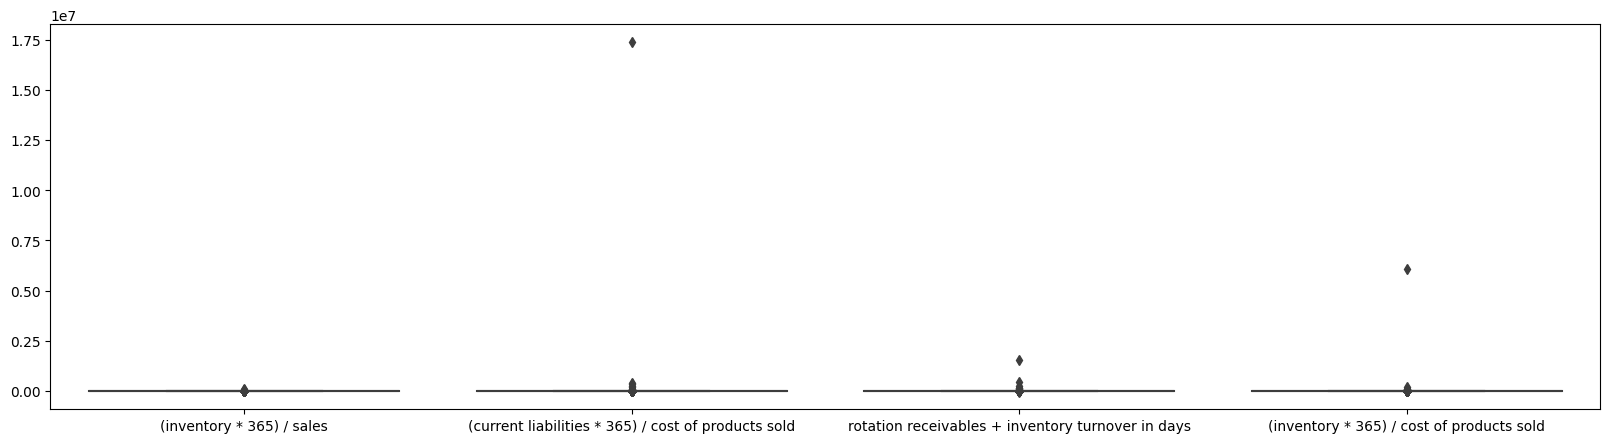

In [8]:
#Plot Category -1 : BoxPlots
plt.figure(figsize=(20,5))
a1=DF.loc[:,[DF.columns[19]]]
a2=DF.loc[:,[DF.columns[31]]]
a3=DF.loc[:,[DF.columns[42]]]
a4=DF.loc[:,[DF.columns[46]]]
d=np.c_[a1,a2,a3,a4]

data_plot=pd.DataFrame(data=d,columns=[DF.columns[19],DF.columns[31],DF.columns[42],DF.columns[46]])
P=sns.boxplot(data=data_plot)

From above box plots, we see that there are outliers in data that will make further plotting difficult.      
So, for only plotting purpose, we will make a function, which takes an array and returns another array in which the data points out of 6-sigma variation would not be present

In [9]:
def filter (B):
   """This function excludes those values from an array which are outside the 6-sigma variation"""
   A=B.copy()
   for k in range(0,5):
      l=np.nanmean(A)-3*np.nanstd(A)
      u=np.nanmean(A)+3*np.nanstd(A)
      na=float('NaN')
      Idx=(A<l)
      A[Idx]=na
      Idx=(A>u)
      A[Idx]=na
   return A

Now, we will again make the same box plots, but with data points removed which were out of 6-sigma variation

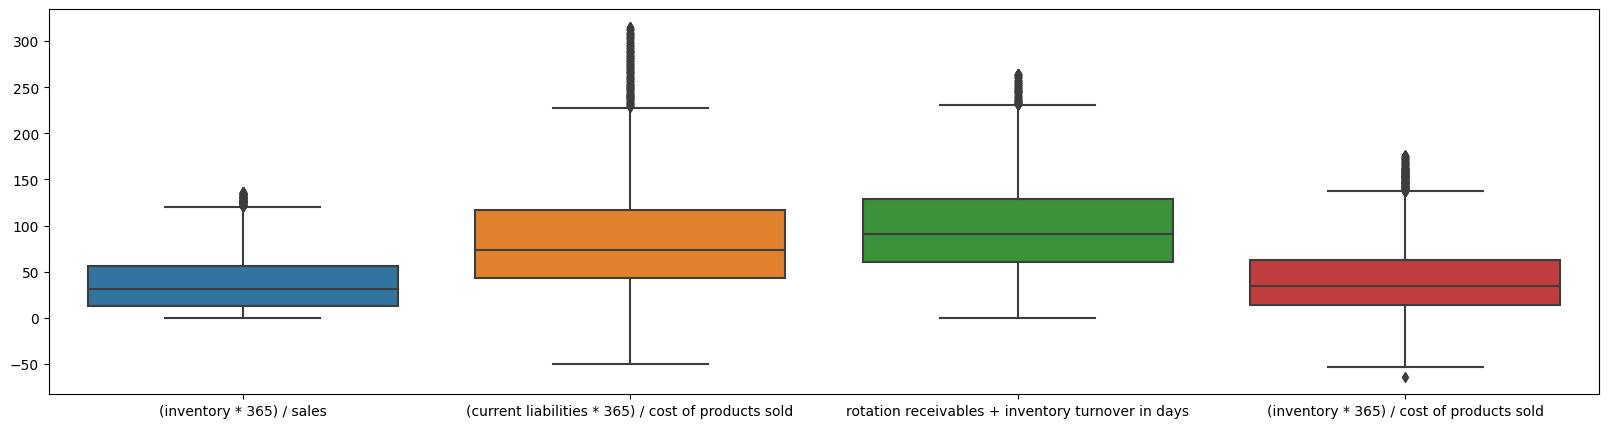

In [10]:
plt.figure(figsize=(20,5))
a1=filter(DF.loc[:,[DF.columns[19]]])
a2=filter(DF.loc[:,[DF.columns[31]]])
a3=filter(DF.loc[:,[DF.columns[42]]])
a4=filter(DF.loc[:,[DF.columns[46]]])
d=np.c_[a1,a2,a3,a4]

data_plot=pd.DataFrame(data=d,columns=[DF.columns[19],DF.columns[31],DF.columns[42],DF.columns[46]])
P=sns.boxplot(data=data_plot)

From above box plots, we see that our function did a good job in flitering the points which were out of 6-sigma variation. So, for further plotting, we will be using this function

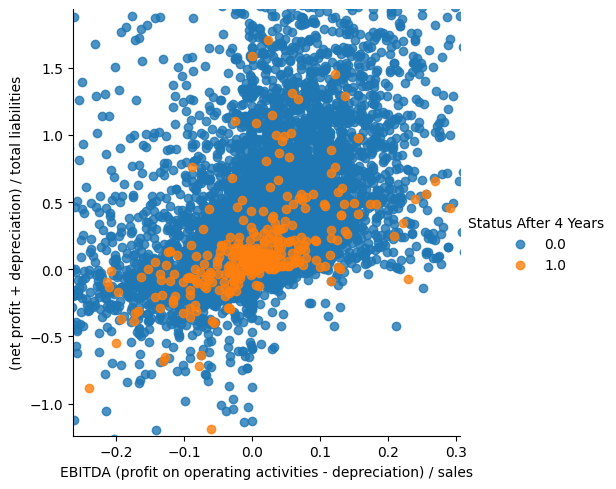

In [11]:
# Firstly, We will try Scatter Plots between different combinations of attribute to observe if we can get some information out of them

# Plot Category - 2: Scatter Plots

# Scatter Plot -1
data_plot=DF.loc[:,[DF.columns[48],DF.columns[25],'Status After 4 Years']]
P=sns.lmplot(x=DF.columns[48],y=DF.columns[25],hue='Status After 4 Years',data=data_plot,fit_reg=False)
x1=np.nanmin(filter(data_plot.iloc[:,0]))
x2=np.nanmax(filter(data_plot.iloc[:,0]))
y1=np.nanmin(filter(data_plot.iloc[:,1]))
y2=np.nanmax(filter(data_plot.iloc[:,1]))
P.set(xlim=(x1,x2))
P.set(ylim=(y1,y2));

The above plot shows that there is relevant information content in the attribute - '(net profit + depreciation) / total liabilities' as the data points with Status 1 are largely concentrated around zero.
 
This plot also shows that the attribute - 'EBITDA (profit on operating activities - depreciation) / sales' , does not have significant variation between status 0 and 1.

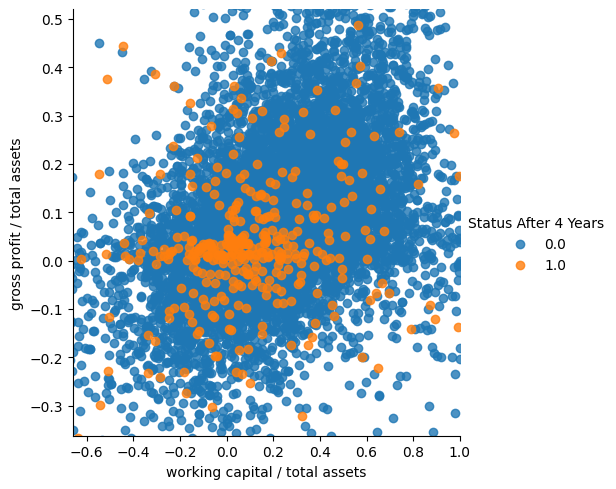

In [12]:
# Scatter Plot -2
data_plot=DF.loc[:,[DF.columns[2],DF.columns[17],'Status After 4 Years']]
P=sns.lmplot(x=DF.columns[2],y=DF.columns[17],hue='Status After 4 Years',data=data_plot,fit_reg=False)
x1=np.nanmin(filter(data_plot.iloc[:,0]))
x2=np.nanmax(filter(data_plot.iloc[:,0]))
y1=np.nanmin(filter(data_plot.iloc[:,1]))
y2=np.nanmax(filter(data_plot.iloc[:,1]))
P.set(xlim=(x1,x2))
P.set(ylim=(y1,y2));

The above plot gives us an indication that both of theses attributes:    
'working capital/total assets' and 'goss profit/total assets' are not best predictors for our objective.

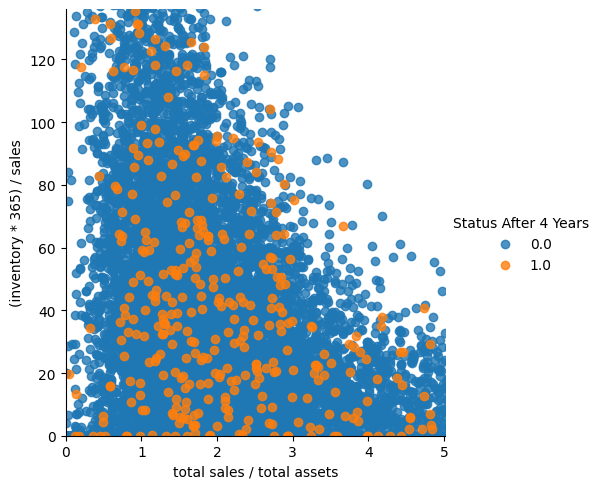

In [13]:
# Scatter Plot -3
data_plot=DF.loc[:,[DF.columns[35],DF.columns[19],'Status After 4 Years']]
P=sns.lmplot(x=DF.columns[35],y=DF.columns[19],hue='Status After 4 Years',data=data_plot,fit_reg=False)
x1=np.nanmin(filter(data_plot.iloc[:,0]))
x2=np.nanmax(filter(data_plot.iloc[:,0]))
y1=np.nanmin(filter(data_plot.iloc[:,1]))
y2=np.nanmax(filter(data_plot.iloc[:,1]))
P.set(xlim=(x1,x2))
P.set(ylim=(y1,y2));

From above plot, we can see that both of the above attributes are not the ideal candidates for our predictors

Now that we have made some scatter plots, we can say that although they give us an idea but not the whole picture,      
simply, because we cannot get information about the density of the datapoints     

Therefore, we will try Distribution Plots

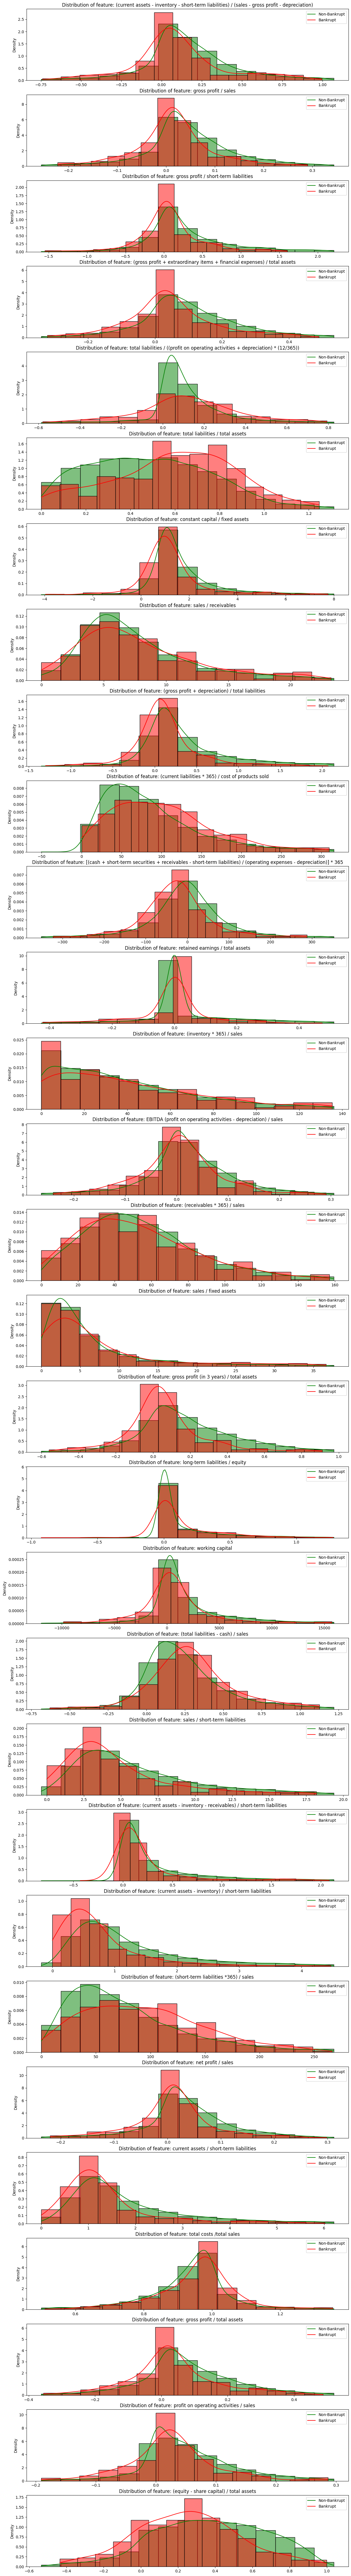

In [14]:
#Plot Category -3: Distribution Plots

# We will make histograms for a few attributes but separate for Bankrupt Companies and Non-bankrupt Companies

import matplotlib.gridspec as gridspec
import random

attributes=[DF.columns[i] for i in random.sample(range(0,64),30)]
nplots=np.size(attributes)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, att in enumerate(attributes):
    fig = plt.subplot(gs[i])
    data=filter(DF[att])
    data_status_0=data[DF['Status After 4 Years']==0]
    data_status_1=data[DF['Status After 4 Years']==1]
    sns.histplot(data_status_0, stat="density", kde=True, color="green", bins=15)
    sns.histplot(data_status_1, stat="density", kde=True, color="red", bins=15)

    fig.legend(['Non-Bankrupt', 'Bankrupt'],loc='best')
    fig.set_xlabel('')
    fig.set_title('Distribution of feature: ' + att)

In the above plots, we attempted to visualize how different are the density distributions of the data points for Bankrupt and Non-bankrupt companies, for different features. In other words, we tried to find whether the data points in the two categories belonged to similar populations or clearly different populations.

From the first level analysis, it appears that for majority of the features, the data points from two categories belong to very similar populations or distributions.     

This means that it will be very challenging to make accurate predictions about the bankruptcy status.

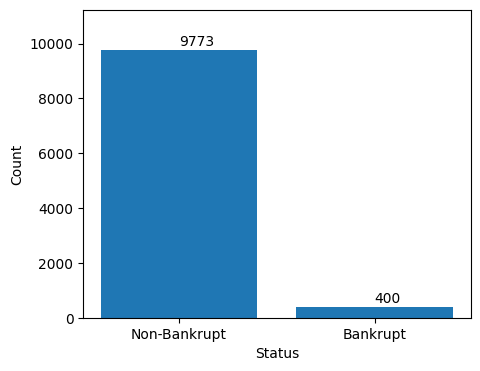

In [15]:
# Plot Category - 4 : Bar Plots
# Let us also visualize how many instances of bankrupt and non-bankrupt companies we have
a=DF.groupby('Status After 4 Years')['Status After 4 Years'].count()
plt.figure(figsize=(5,4))
plt.bar(height=a,x=['Non-Bankrupt','Bankrupt'])
plt.ylabel('Count')
plt.xlabel('Status');
plt.text(0,a[0]+150,str(a[0]))
plt.text(1,a[1]+150,str(a[1]))
plt.ylim(0,1.15*a[0]);

Since, more than 96% of the datapoints available are Non-bankrupt companies, it is safe to say that our dataset is not balanced.    
This information is important in the choice of machine learing model.    
For example, a model like KNN would be a bad choice in this scenerio.

Next, we will check the relationship between different attributes using correlation matrix

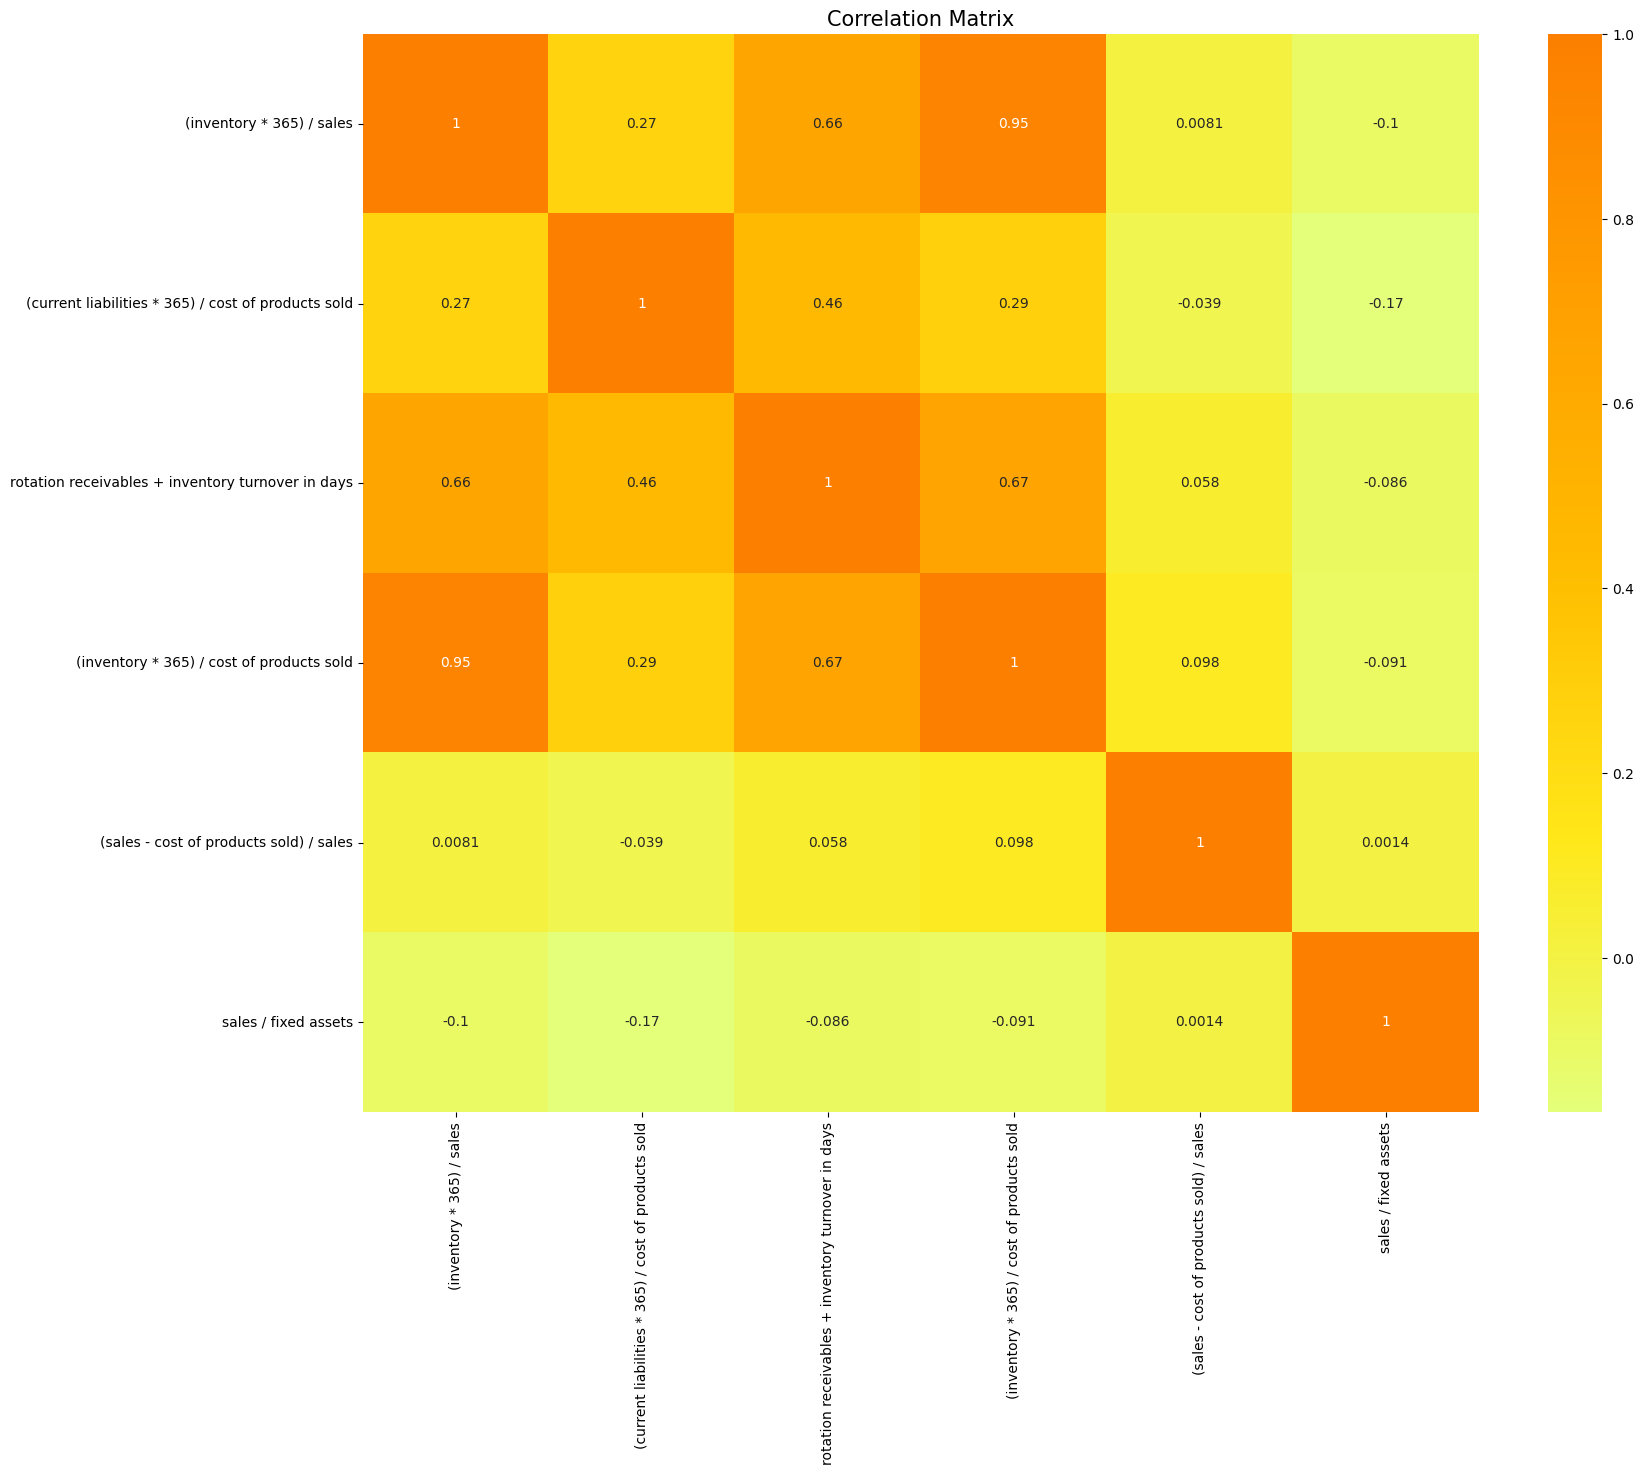

In [16]:
# Plot Category - 5 : Correlation Matrix
plt.figure(figsize=(18,14))
a1=filter(DF.loc[:,[DF.columns[19]]])
a2=filter(DF.loc[:,[DF.columns[31]]])
a3=filter(DF.loc[:,[DF.columns[42]]])
a4=filter(DF.loc[:,[DF.columns[46]]])
a5=filter(DF.loc[:,[DF.columns[55]]])
a6=filter(DF.loc[:,[DF.columns[63]]])
d=np.c_[a1,a2,a3,a4,a5,a6]

data_plot=pd.DataFrame(data=d,columns=[DF.columns[19],DF.columns[31],DF.columns[42],DF.columns[46],DF.columns[55],DF.columns[63]])

sns.heatmap(data_plot.corr(),cmap='Wistia',annot=True)
plt.title('Correlation Matrix',fontsize=15);

From the above correlation matrix, we can see that some attributes have practically no correlation with each other while some have correlation coefficient as high as 0.95.    
This gives us an important clue that in our data cleaning step, we should eliminate some attributes which are highly correlated to others. This can be achieved by techniques such as Principal Component Analysis (PCA).

In [17]:
# Checking number of missing values
# This will help identify if a column has too many missing values
missing=[]
for i in range(0,64):
   n=(DF[DF.columns[i]])
   m=np.isnan(n)
   missing.append(len(n[m]))

ind=[]
for i in range(0,64):
   if missing[i]>1000:
      ind.append(i)
      print("Maximum Number of Missing Data Points in a column are",missing[i])
      print("In column:",DF.columns[i])
      print("At Index:",i)

Maximum Number of Missing Data Points in a column are 3164
In column: sales (n) / sales (n-1)
At Index: 20
Maximum Number of Missing Data Points in a column are 4518
In column: (current assets - inventories) / long-term liabilities
At Index: 36


In [18]:
# Removing columns where number of missing values are more than 1000
# Because these number are relatively significant with respect to total number of datapoints

DF_new=DF.copy(deep=True)
col=[DF.columns[i] for i in ind]
DF_new=DF_new.drop(columns=col)

In [19]:
# Now, replacing missing vaues with the mean of the entire column

for i in range(0,DF_new.shape[1]-1):
   
   a=DF_new[DF_new.columns[i]]
   I=np.isnan(a)
   a[I]=np.nanmean(a)

Before proceeding further,    
We will split our dataset into Training Set (75%) and Test Set (25%) 
This should be done here to ensure that our decision in futher process are not influenced by test set data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_Train, X_Test, y_Train, y_Test = train_test_split(DF_new.iloc[:,0:DF_new.shape[1]-1],DF_new.iloc[:,DF_new.shape[1]-1], test_size=0.25, random_state=40)

We shall standardize the test and training data, as we will implement PCA technique afterwards which works if the data is standardized.

In [22]:
# Standardizing the Training Set as well as the Test Set
scaler=StandardScaler()
scaler.fit(X_Train.values)
D=scaler.transform(X_Train.values)
X_Train_Std= pd.DataFrame(D, index=X_Train.index, columns=X_Train.columns)
D=scaler.transform(X_Test.values)
X_Test_Std= pd.DataFrame(D, index=X_Test.index, columns=X_Test.columns)

In [23]:
# Computing the data covariance matrix
S=np.cov(X_Train_Std.T)
S.shape

(62, 62)

In [24]:
# Computing Eigen Vectors and Eigen Values

eigenValues, eigenVectors = np.linalg.eigh(S)
idx = (eigenValues).argsort()[::-1]
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:, idx]

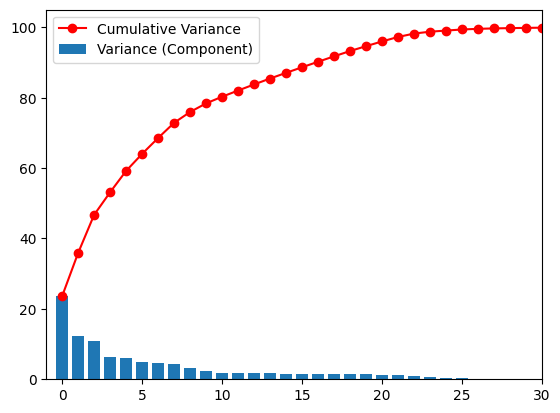

0 0.23578071425336578
1 0.3586362764578271
2 0.46696744057968304
3 0.531277543392259
4 0.5919696407854645
5 0.6403303576800368
6 0.6854263887071114
7 0.7286137768416511
8 0.7593529960790243
9 0.7838481085273363
10 0.8027296997184242
11 0.8203498509810087
12 0.8375828634570421
13 0.8544726604889669
14 0.8705684886801048
15 0.8864649903469534
16 0.9020441599556333
17 0.9175188863728803
18 0.9325580510608146
19 0.9464027916006933
20 0.9598231644957473
21 0.9725026730809644
22 0.9821387174407344


In [25]:
# Calculating the number of components required to cover 98% of variance present in data
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)

plt.bar(range(len(expVar)), expVar, label='Variance (Component)')
plt.plot(cumExpVar, 'r-o', label='Cumulative Variance')
plt.xlim(-1,30)
plt.legend()
plt.show()

variance=0.98
for idx, cumulativeSum in enumerate(np.cumsum(eigenValues) / np.sum(eigenValues)):
   print(idx,cumulativeSum)
   if cumulativeSum > variance:     
     break

In [26]:
# Therefore, the basis vectors matrix can be calculated as below,
B=eigenVectors[:,0:idx+1]

# We get updated Data-Frames as below,
col=[('f'+str(i+1)) for i in range(0,idx+1)]
X_Red_Train=np.dot(X_Train_Std,B)
X_Red_Train=pd.DataFrame(data=X_Red_Train,columns=col)
X_Red_Test=np.dot(X_Test_Std,B)
X_Red_Test=pd.DataFrame(data=X_Red_Test,columns=col)

In [27]:
# Training Set will look as below with only 23 attributes (instead of 62) which are made by linear combination of the 62 attributes
# It is to be noted here that, while reducing the number of attributes, we have lost only 2% of the information content, rest 98% we have preserved
X_Red_Train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23
0,-0.247954,0.136422,0.031125,-0.083658,-0.114264,0.018377,-0.039029,0.096307,-0.039052,-1.572714,...,0.128822,-0.031682,0.254370,0.010239,-0.055650,-0.091517,0.427420,0.370157,-0.633815,-0.478628
1,0.059499,0.077180,0.032157,-0.109410,-0.218593,0.026044,-0.056597,-0.009502,-0.055738,0.029701,...,0.024719,0.017038,0.010500,-0.054882,-0.015220,-0.033053,-0.013829,-0.169938,0.249674,-0.035568
2,0.015418,0.225106,0.005461,0.035699,0.173931,0.020734,-0.046704,0.051671,-0.008107,0.039307,...,0.048601,0.031089,0.029420,-0.026295,-0.012232,-0.015161,0.042014,-0.100542,0.097825,-0.107215
3,-0.058170,0.259621,-0.000634,0.011527,0.078888,0.018625,-0.062042,0.039051,-0.017138,0.045302,...,0.101173,0.002381,0.146869,-0.024626,-0.029066,-0.038656,0.235835,0.048611,-0.162919,-0.339176
4,0.064939,0.036834,0.044602,-0.087445,-0.169052,0.013945,-0.008334,0.030596,0.092912,0.031586,...,-0.348497,0.004461,-0.043130,-0.008580,0.188623,-0.007092,0.309045,0.361548,-0.572660,-0.085390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7624,0.100245,0.184563,-0.007639,-0.084092,-0.188219,0.033287,-0.110182,-0.071797,-0.077428,0.025538,...,0.024224,0.042256,-0.088027,-0.144825,0.051528,-0.060620,-0.232437,-0.806930,1.179799,-0.041461
7625,0.026996,0.122593,0.023657,-0.088982,-0.170577,0.022401,-0.053927,0.005074,-0.039419,0.034045,...,0.058111,0.005733,0.067933,-0.037850,-0.027341,-0.025686,0.117911,-0.032417,-0.032343,-0.101147
7626,0.002320,-0.034819,0.080395,-0.064741,-0.032153,0.010109,0.076272,0.089563,0.006242,0.038481,...,0.059470,0.005854,0.034368,0.041678,-0.018785,0.058286,0.134126,0.710610,-1.002683,0.175170
7627,0.077200,0.205919,-0.010018,-0.046256,-0.051886,0.024255,-0.061589,-0.015658,-0.041431,0.028404,...,0.008292,0.036766,-0.058588,-0.053842,-0.000809,-0.012931,-0.123763,-0.282770,0.388302,0.052707


In [28]:
# Test Set will look as below,
X_Red_Test

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23
0,0.031513,0.193560,0.000864,-0.053219,-0.104144,0.022488,-0.067893,-0.023096,0.015420,0.034569,...,0.039636,0.027086,0.008085,-0.051175,-0.008266,-0.018290,-0.006224,-0.141704,0.189472,-0.075349
1,-0.068684,0.264336,-0.017802,1.429963,4.270987,-0.002298,0.206467,0.987864,-0.068601,0.087203,...,0.002102,-3.314487,-0.725477,0.058980,-0.036372,0.015979,-0.171180,-0.068887,0.087373,-0.010165
2,0.056279,0.044550,0.044764,-0.082426,-0.135257,0.018126,0.014219,0.020061,-0.026905,0.030557,...,0.031987,0.001346,0.100744,0.020092,-0.008446,0.000894,0.093373,0.174390,-0.357588,-0.002864
3,0.119035,-0.024826,0.066995,-0.125685,-0.268074,0.020420,-0.031063,-0.015935,0.190840,0.021525,...,-4.711379,-0.852775,4.168220,0.136705,-4.328948,-0.063067,-0.439779,-0.295469,0.298737,0.352732
4,-0.069856,0.212846,0.013642,0.032576,0.106601,0.017376,-0.063014,-0.004401,-0.041415,0.040761,...,0.072435,0.014025,0.095535,-0.029919,-0.039610,-0.017449,0.195689,0.089440,-0.233514,-0.153336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,0.040116,0.052166,0.044917,-0.090506,-0.158042,0.019968,-0.024196,0.024462,-0.036338,0.031399,...,-0.005293,-0.022738,0.055453,-0.022251,-0.021320,-0.012394,0.130548,0.160137,-0.285795,-0.060952
2540,0.011743,0.092949,0.039488,-0.079191,-0.113672,0.014650,-0.003261,0.033571,-0.015852,0.035307,...,0.008222,0.001166,0.051366,-0.005458,-0.059390,0.024709,0.091164,0.410626,-0.537047,0.102401
2541,0.079868,0.007916,0.054390,-0.097120,-0.173753,0.018067,-0.011054,0.024251,0.029610,0.029567,...,-0.028082,0.000098,0.072570,-0.024473,-0.066933,0.007260,0.054950,0.210885,-0.364268,0.069007
2542,0.115878,-0.032363,0.060680,-0.123102,-0.258742,0.023369,-0.032655,-0.016688,-0.030050,0.024479,...,-0.023198,0.010243,0.023499,-0.056807,-0.041746,-0.012311,-0.025918,-0.048820,0.015189,0.085985


Now that we have our dataset with reduced dimensionality,    
we will calculate Area Under Curve Metrics (AUC) for all features with respect to status of bankruptcy. This will give us important information about which feature is more capable of predicting the status and which feature has just the same distribution for both Bankrupt and Non-bankrupt

In [29]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score

In [30]:
feature_names=X_Red_Train.columns[0:23]
auc_Train=[]

for feature in feature_names:
    X_Train_=X_Red_Train[feature]
    gm = GaussianMixture(n_components=1,random_state=0)
    gm.fit((X_Train_.values).reshape(-1,1))
    p_Train = gm.score_samples((X_Train_.values).reshape(-1,1))
    
    auc_Train.append(roc_auc_score(y_Train,-1*p_Train))
    
Columns =['feature','AUC for Training Set']
S=np.c_[feature_names,auc_Train]
df_scores=pd.DataFrame(data=S,columns=Columns)
df_scores

,feature,AUC for Training Set
0,f1,0.587163
1,f2,0.406335
2,f3,0.649398
3,f4,0.595875
4,f5,0.568845
5,f6,0.522229
6,f7,0.483861
7,f8,0.48026
8,f9,0.476279
9,f10,0.3993


From above table, we see that AUC score for almost all features are close to 0.5, i.e. the above table tells that, financial data in year 2 of study is not an ideal candidate for predicting bankupty status after 4 years.   

However, we will still try two different machine learning models and evaluate their performance.

**Machine Learning Model - 1 : Gaussian Mixture Model**

First, we will try to fit a Gaussian Mixture Model with different number of Gaussians and components on training set.     
We will select this model as this model is good at detecting outliers/anomalies or data points out of the concerned distribution:

In [31]:
X_Train=X_Red_Train.copy(deep=True)
X_Test=X_Red_Test.copy(deep=True)
X_Train['Status After 4 Years']=y_Train

# We will fit the model for non-bankrupt with only one class : Non-Bankrupt
X_Train_0=X_Train[(X_Train['Status After 4 Years'])==0]
X_Train_0=X_Train_0.drop(columns='Status After 4 Years')

# We will fit the model for Bankrupt (when we use Two Gaussians) with only one class : Bankrupt
X_Train_1=X_Train[(X_Train['Status After 4 Years'])==1]
X_Train_1=X_Train_1.drop(columns='Status After 4 Years')

X_Train=X_Train.drop(columns='Status After 4 Years')

In [32]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [33]:
# Defining a function which will return optimum threshold value based on F1 score

def opt_threshold(target,p_values):
   
   tr_sort = sorted(p_values)
   List_Find_Threshold=[1, 10, 20, 30, 50 , 90, 160, 250, 380, 500, 650 , 850, 1100, 1400, 1800, 2300];
   F1_score=np.zeros(len(List_Find_Threshold))
   threshold=np.zeros(len(List_Find_Threshold))
   
   for i in range(0,len(List_Find_Threshold)):        
        tr = tr_sort[ List_Find_Threshold[i]] 
        threshold[i]=tr
        F1_score[i]=f1_score(target, p_values < tr)
   
   ind=np.argmax(F1_score)
   return(threshold[ind],F1_score[ind])

In [34]:
# Trial-1
# One Gaussian, One Component
gm1 = GaussianMixture(n_components=1,random_state=0)
gm1.fit(X_Train_0)

p_Train = gm1.score_samples(X_Train) 
   
Threshold,F1=opt_threshold(y_Train,p_Train)

precision_Train=precision_score(y_Train, p_Train < Threshold)
recall_Train=recall_score(y_Train, p_Train < Threshold)
F1_Train=f1_score(y_Train, p_Train < Threshold)
accuracy_Train=accuracy_score(y_Train, p_Train < Threshold)

print("F1 score for Model 1 for Training Set is ",F1_Train)
print("Precision for Model 1 for Training Set is ",precision_Train)
print("Recall for Model 1 for Training Set is ",recall_Train)
print("Accuracy for Model 1 for Training Set is ",accuracy_Train)

F1 score for Model 1 for Training Set is  0.08079376328844791
Precision for Model 1 for Training Set is  0.05181818181818182
Recall for Model 1 for Training Set is  0.1832797427652733
Accuracy for Model 1 for Training Set is  0.8299908244855158


In [35]:
# Trial-2
# One Gaussian, Three Components
gm1 = GaussianMixture(n_components=3,random_state=0)
gm1.fit(X_Train_0)

p_Train = gm1.score_samples(X_Train) 
   
Threshold,F1=opt_threshold(y_Train,p_Train)

precision_Train=precision_score(y_Train, p_Train < Threshold)
recall_Train=recall_score(y_Train, p_Train < Threshold)
F1_Train=f1_score(y_Train, p_Train < Threshold)
accuracy_Train=accuracy_score(y_Train, p_Train < Threshold)

print("F1 score for Model 2 for Training Set is ",F1_Train)
print("Precision for Model 2 for Training Set is ",precision_Train)
print("Recall for Model 2 for Training Set is ",recall_Train)
print("Accuracy for Model 2 for Training Set is ",accuracy_Train)

F1 score for Model 2 for Training Set is  0.08221119773210489
Precision for Model 2 for Training Set is  0.05272727272727273
Recall for Model 2 for Training Set is  0.1864951768488746
Accuracy for Model 2 for Training Set is  0.8302529820422073


In [36]:
# Trial-3
# Two Gaussians
# Gaussian-1 for non-bankrupt : 3 components
# Gaussian-2 for bankrupt : 2 components
gm1 = GaussianMixture(n_components=3,random_state=0)
gm1.fit(X_Train_0)
p1 = gm1.score_samples(X_Train) 
   
gm2 = GaussianMixture(n_components=2,random_state=0)
gm2.fit(X_Train_1)
p2 = gm2.score_samples(X_Train) 

c=np.arange(0.1,10.1,0.1)
F1_score=np.zeros(len(c))
for i in range(0,len(c)):
  F1_score[i]=f1_score(y_Train, p1 >(c[i])*p2)

ind=np.argmax(F1_score)
c=c[ind]


precision_Train=precision_score(y_Train, p1>c*p2)
recall_Train=recall_score(y_Train, p1>c*p2)
F1_Train=f1_score(y_Train, p1>c*p2)
accuracy_Train=accuracy_score(y_Train, p1>c*p2)

print("F1 score for Model 3 for Training Set is ",F1_Train)
print("Precision for Model 3 for Training Set is ",precision_Train)
print("Recall for Model 3 for Training Set is ",recall_Train)
print("Accuracy for Model 3 for Training Set is ",accuracy_Train)

F1 score for Model 3 for Training Set is  0.11584699453551911
Precision for Model 3 for Training Set is  0.08774834437086093
Recall for Model 3 for Training Set is  0.17041800643086816
Accuracy for Model 3 for Training Set is  0.8939572683182593


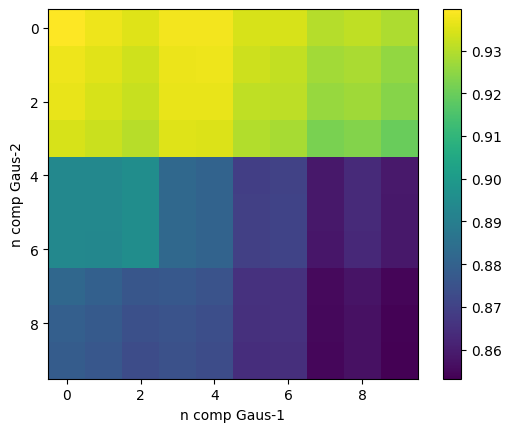

In [37]:
# Trial-4
# Two Gaussians with fewer features

# Tuning Hyper-parameters

Train_Accuracy=np.full((10,10),0.0)

feat=['f1','f3','f4','f5','f14','f18','f19']

for i in range(0,10):
    
    for j in range(0,10):
              
       gm1 = GaussianMixture(n_components=i+1,random_state=0)
       gm1.fit(X_Train_0[feat])
       p1 = gm1.score_samples(X_Train[feat]) 
   
       gm2 = GaussianMixture(n_components=j+1,random_state=0)
       gm2.fit(X_Train_1[feat])
       p2 = gm2.score_samples(X_Train[feat]) 

       c=np.arange(0.1,10.1,0.1)
       acc=np.zeros(len(c))
       for k in range(0,len(c)):
           acc[k]=accuracy_score(y_Train, p1 >(c[k])*p2)

       ind=np.argmax(acc)
       c=c[ind]
       accuracy_Train=accuracy_score(y_Train, p1>c*p2)
       Train_Accuracy[i,j]=accuracy_Train  

T=plt.imshow(Train_Accuracy,interpolation='none')
plt.colorbar(T);
plt.xlabel('n comp Gaus-1')
plt.ylabel('n comp Gaus-2');

In [38]:
gm1 = GaussianMixture(n_components=1,random_state=0)
gm1.fit(X_Train_0[feat])
p1 = gm1.score_samples(X_Train[feat]) 
  
gm2 = GaussianMixture(n_components=2,random_state=0)
gm2.fit(X_Train_1[feat])
p2 = gm2.score_samples(X_Train[feat]) 

c=np.arange(0.1,10.1,0.1)
acc=np.zeros(len(c))
for k in range(0,len(c)):
    acc[k]=accuracy_score(y_Train, p1 >(c[k])*p2)

ind=np.argmax(acc)
c=c[ind]

precision_Train=precision_score(y_Train, p1>c*p2)
recall_Train=recall_score(y_Train, p1>c*p2)
F1_Train=f1_score(y_Train, p1>c*p2)
accuracy_Train=accuracy_score(y_Train, p1>c*p2)

print("F1 score for Model 4 for Training Set is ",F1_Train)
print("Precision for Model 4 for Training Set is ",precision_Train)
print("Recall for Model 4 for Training Set is ",recall_Train)
print("Accuracy for Model 4 for Training Set is ",accuracy_Train)

F1 score for Model 4 for Training Set is  0.03636363636363636
Precision for Model 4 for Training Set is  0.04891304347826087
Recall for Model 4 for Training Set is  0.028938906752411574
Accuracy for Model 4 for Training Set is  0.9374754227290601


In [39]:
# Now lets measure accuracy for the Model 4 on Test Set

p1= gm1.score_samples(X_Test[feat]) 
p2= gm2.score_samples(X_Test[feat]) 

precision_Train=precision_score(y_Test, p1>c*p2)
recall_Train=recall_score(y_Test, p1>c*p2)
F1_Train=f1_score(y_Test, p1>c*p2)
accuracy_Train=accuracy_score(y_Test, p1>c*p2)

print("F1 score for Model 4 for Test Set is ",F1_Train)
print("Precision for Model 4 for Test Set is ",precision_Train)
print("Recall for Model 4 for Test Set is ",recall_Train)
print("Accuracy for Model 4 for Test Set is ",accuracy_Train)

F1 score for Model 4 for Test Set is  0.06535947712418301
Precision for Model 4 for Test Set is  0.078125
Recall for Model 4 for Test Set is  0.056179775280898875
Accuracy for Model 4 for Test Set is  0.9437893081761006


From above trials, we can say that for this dataset,   
Gaussian Mixture Models could not give satisfactory F1 score despite getting good accuracy.

**Machine Learning Model - 2: Random Forest Classifier**

From the work done till now, it is quite evident that our data is not linearly separable. In this case, algorithms such as KNN, SVM, etc would not be a good choice.
Therefore, we will try Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [41]:
f1_ = np.zeros(20)    
acc_=np.zeros(20)
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'f1_score' : make_scorer(f1_score)}

# Tuning Hyper-parameters with respect to F1 score
for d in range(12,32):
    randomfor_class= RandomForestClassifier (n_estimators=100,max_depth=d+1,min_samples_split=5,random_state=10)
    results = cross_validate(estimator=randomfor_class,X=X_Train, y=y_Train,cv=5, scoring=scoring)

    f1_[d-12]=(results['test_f1_score']).mean()  
    acc_[d-12]=(results['test_accuracy']).mean()

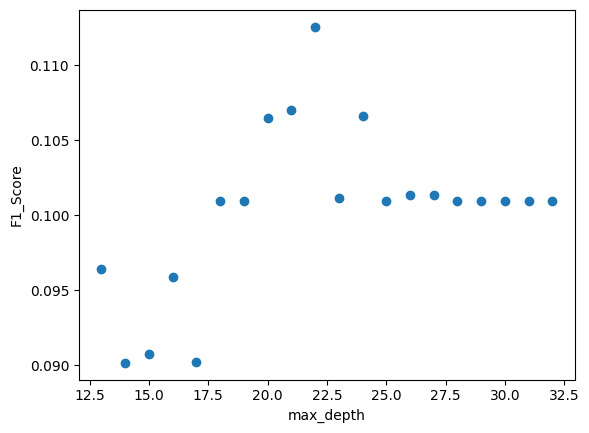

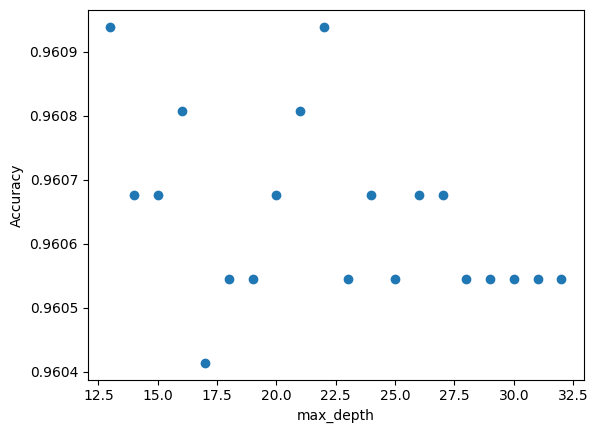

In [42]:
x=np.arange(13,33,1)
plt.scatter(x,f1_)
plt.xlabel('max_depth')
plt.ylabel('F1_Score')
plt.show()

plt.scatter(x,acc_)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

In [46]:
# Fitting Model as per tuned hyper-parameters
randomfor_class= RandomForestClassifier (n_estimators=100,max_depth=22,min_samples_split=5,random_state=10)
randomfor_class.fit(X_Train,y_Train)
y_pred_train=randomfor_class.predict(X_Train)


precision_Train=precision_score(y_Train, y_pred_train)
recall_Train=recall_score(y_Train, y_pred_train)
F1_Train=f1_score(y_Train, y_pred_train)
accuracy_Train=accuracy_score(y_Train, y_pred_train)

print("F1 score for Model 1 for Training Set is ",F1_Train)
print("Precision for Model 1 for Training Set is ",precision_Train)
print("Recall for Model 1 for Training Set is ",recall_Train)
print("Accuracy for Model 1 for Training Set is ",accuracy_Train)

F1 score for Model 1 for Training Set is  0.8502772643253235
Precision for Model 1 for Training Set is  1.0
Recall for Model 1 for Training Set is  0.7395498392282959
Accuracy for Model 1 for Training Set is  0.9893826189539914


In [47]:
# Testing model on Test Set
y_pred_test=randomfor_class.predict(X_Test)


precision_Test=precision_score(y_Test, y_pred_test)
recall_Test=recall_score(y_Test, y_pred_test)
F1_Test=f1_score(y_Test, y_pred_test)
accuracy_Test=accuracy_score(y_Test, y_pred_test)

print("F1 score for Model 1 for Test Set is ",F1_Test)
print("Precision for Model 1 for Test Set is ",precision_Test)
print("Recall for Model 1 for Test Set is ",recall_Test)
print("Accuracy for Model 1 for Test Set is ",accuracy_Test)

F1 score for Model 1 for Test Set is  0.08163265306122448
Precision for Model 1 for Test Set is  0.4444444444444444
Recall for Model 1 for Test Set is  0.0449438202247191
Accuracy for Model 1 for Test Set is  0.964622641509434


Again, from Random Forest Algorithm, we observe that although we are able to get good accuracy on the test set, but we are getting a poor F1 score.    
This is because the two categories: Bankrupt and Non-bankrupt are belonging to very similar distributions with respect to attributes.      

Summary / Conclusion:
The financial data in Second Year of Forecasting Period is not an ideal predictor for bankruptcy status after 4 years

Now that we have tried two different Machine Learning Models manually,    
we will now proceed for Automated Machine Learning in Azure Machine Learning and will check if any other classification model is able to give us good F1 score.